In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [264]:
# Fetch historical stock price data for Apple (AAPL)
stock_data = yf.download('AAPL',start='2020-01-01',end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [265]:
# Display the first few rows of the data
print(stock_data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960449  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251160  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826843  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484352  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650352  132079200


In [266]:
# Keep only the 'Adj Close' column for analysis
stock_data = stock_data[['Adj Close']]

In [267]:
print(stock_data.head())

            Adj Close
Date                 
2020-01-02  72.960449
2020-01-03  72.251160
2020-01-06  72.826843
2020-01-07  72.484352
2020-01-08  73.650352


In [268]:
# Reset index and adjust Adj Close by one row
stock_data.reset_index(inplace=True)
stock_data.loc[:, 'Adj Close'] = stock_data['Adj Close'].shift(-1)

C:\Users\Shakib\AppData\Local\Temp\ipykernel_15000\4175253012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.loc[:, 'Adj Close'] = stock_data['Adj Close'].shift(-1)


In [269]:
print(stock_data.head())

        Date  Adj Close
0 2020-01-02  72.251160
1 2020-01-03  72.826843
2 2020-01-06  72.484352
3 2020-01-07  73.650352
4 2020-01-08  75.214760


In [270]:
# Create DataFrame
stock_data = pd.DataFrame(stock_data)

In [271]:
# Ensure Date column is in datetime format and set as index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [272]:
# Calculate daily returns and assign it to a new column
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

In [273]:
print(stock_data)

             Adj Close  Daily_Return
Date                                
2020-01-02   72.251160           NaN
2020-01-03   72.826843      0.007968
2020-01-06   72.484352     -0.004703
2020-01-07   73.650352      0.016086
2020-01-08   75.214760      0.021241
...                ...           ...
2023-12-22  192.542831     -0.002841
2023-12-26  192.642548      0.000518
2023-12-27  193.071426      0.002226
2023-12-28  192.024185     -0.005424
2023-12-29         NaN      0.000000

[1006 rows x 2 columns]


In [274]:
# Remove the first row with NaN value
stock_data.dropna(inplace=True)

In [275]:
# Calculate basic statistics using numpy
mean_return = np.mean(stock_data['Daily_Return'])
median_return = np.median(stock_data['Daily_Return'])
std_return = np.std(stock_data['Daily_Return'])

In [276]:
print(f"Mean Daily Return: {mean_return}")
print(f"Median Daily Return: {median_return}")
print(f"Standard Deviation of Daily Return: {std_return}")

Mean Daily Return: 0.0011974320304657406
Median Daily Return: 0.00104144627610947
Standard Deviation of Daily Return: 0.021143113568674095


In [277]:
print(stock_data.head())

            Adj Close  Daily_Return
Date                               
2020-01-03  72.826843      0.007968
2020-01-06  72.484352     -0.004703
2020-01-07  73.650352      0.016086
2020-01-08  75.214760      0.021241
2020-01-09  75.384781      0.002260


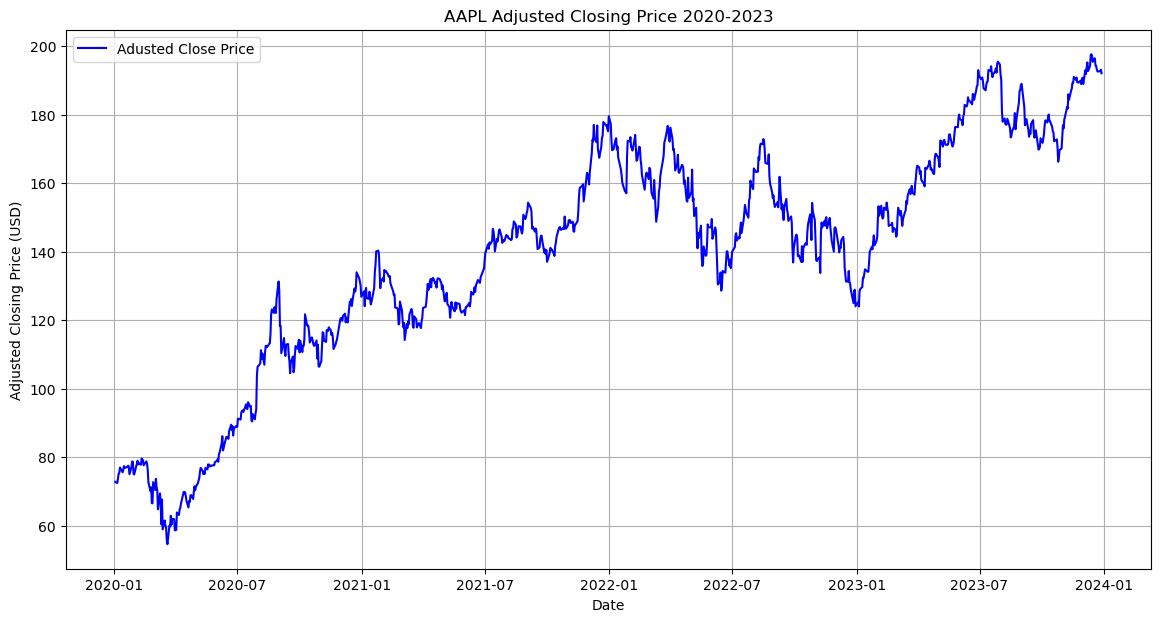

In [278]:
# Plot the adjusted closing price over time
plt.figure(figsize=(14,7))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adusted Close Price', color='blue')
plt.title('AAPL Adjusted Closing Price 2020-2023')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

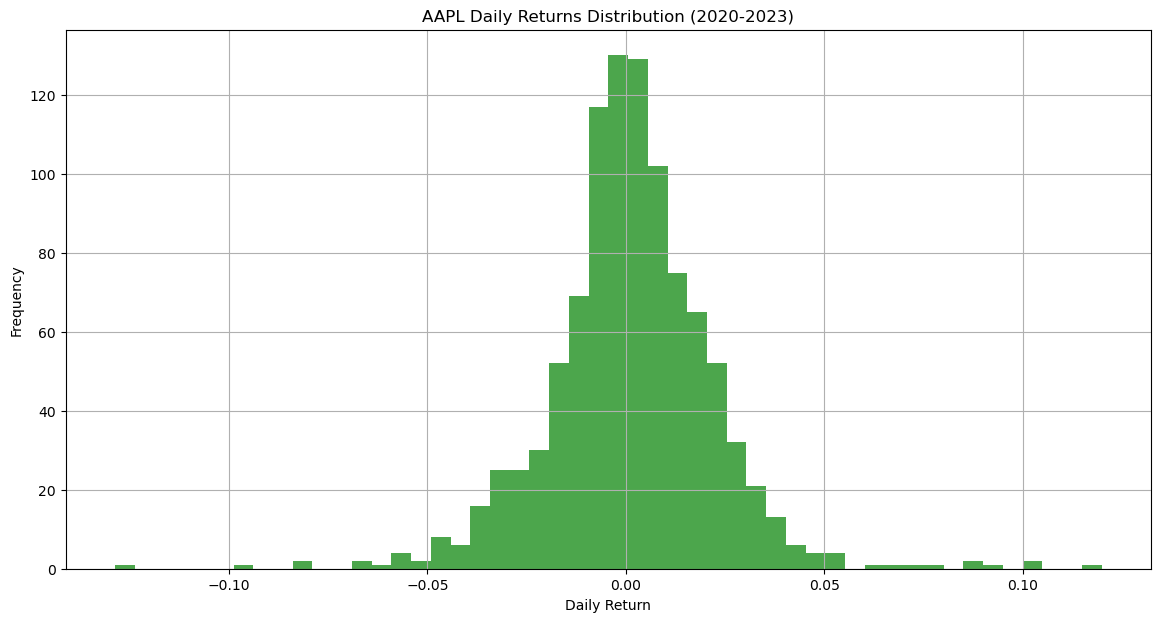

In [279]:
# Plot the daily returns as a histogram

plt.figure(figsize=(14,7))
plt.hist(stock_data['Daily_Return'], bins=50, color='green', alpha=0.7)
plt.title('AAPL Daily Returns Distribution (2020-2023)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

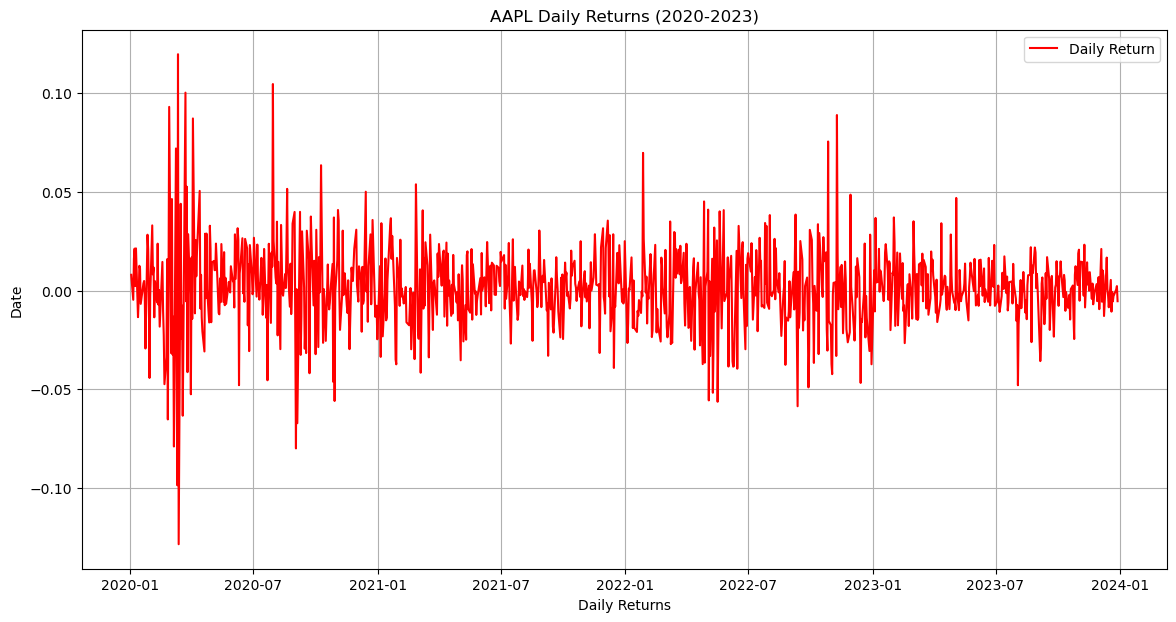

In [280]:
# Plot the daily returns over time

plt.figure(figsize=(14,7))
plt.plot(stock_data.index, stock_data['Daily_Return'], label='Daily Return', color='red')
plt.title('AAPL Daily Returns (2020-2023)')
plt.xlabel('Daily Returns')
plt.ylabel('Date')
plt.legend()
plt.grid(True)
plt.show()